In [15]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import ascii
from astropy.io import fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [30]:
#read image into standard 2-d numpy array

hdul = fits.open("FOCx38i0101t_c0f.fits")
hdul.info()

data = hdul[0].data

Filename: FOCx38i0101t_c0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     134   (1024, 1024)   float32   
  1  x38i0101t.c0h.tab    1 TableHDU        82   1R x 18C   [D25.16, D25.16, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A4, E15.7, I11, I11, D25.16, D25.16, A8, A8]   


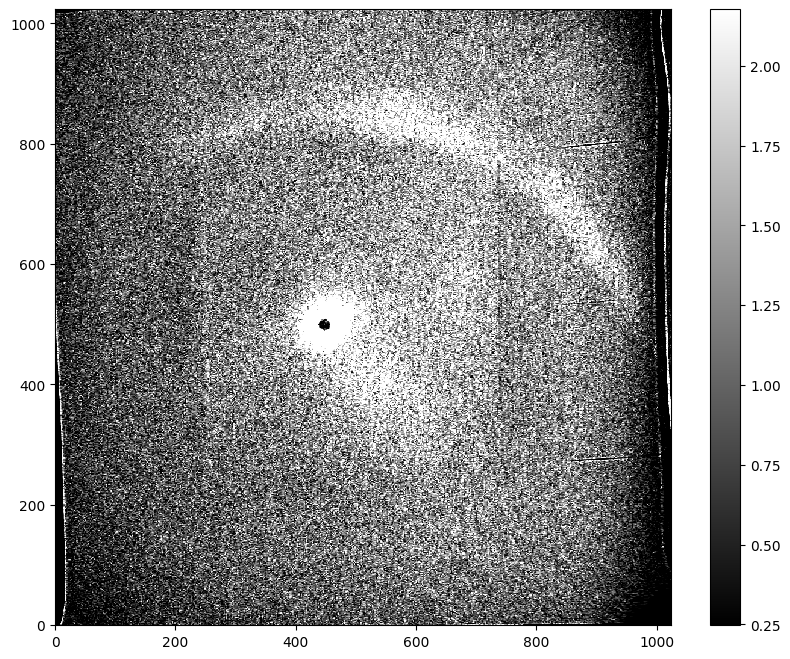

In [65]:
#show the image
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig("fit-image.png",dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# measure a spatially varying background on the image

#used to shorten the image because its to large for the background function to work
data = data.astype(data.dtype.newbyteorder('='))

bkg = sep.Background(data)

In [45]:
#get a "global" mean and noise of the image background

print(bkg.globalback)
print(bkg.globalrms)

1.0365936756134033
0.5485350489616394


In [46]:
bkg_image = bkg.back()

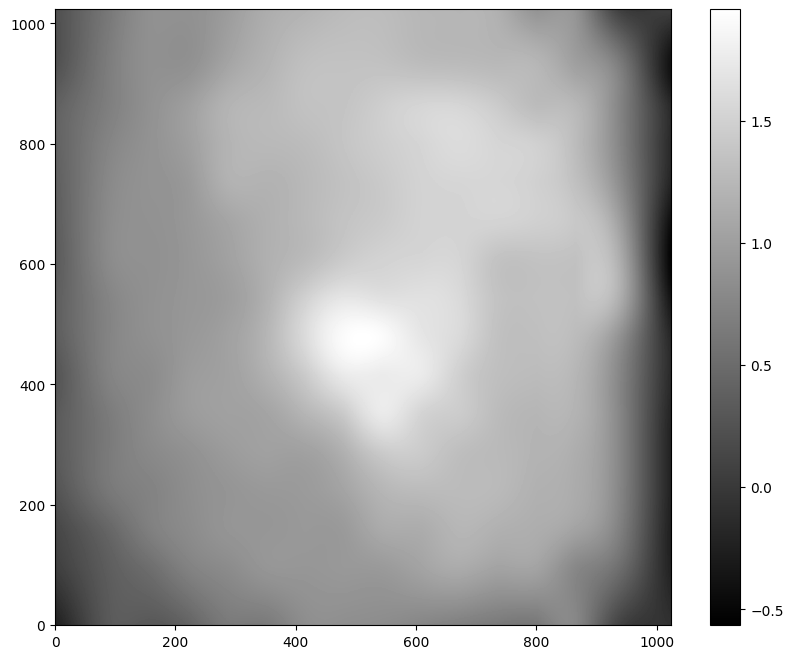

In [64]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("background-noise-of-the-fit.png",dpi=300, bbox_inches='tight')
plt.show()

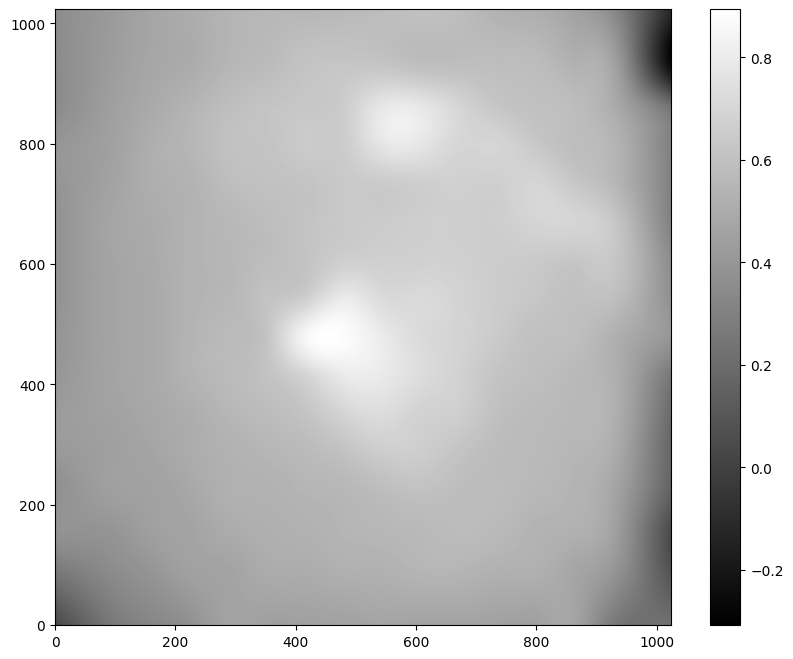

In [62]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

#show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("evaluation-of-the-background-noise.png",dpi=300, bbox_inches='tight')
plt.show()

In [52]:
data_sub = data - bkg
#subtracts the background?

In [54]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

#how man objects were detected
len(objects)

2453

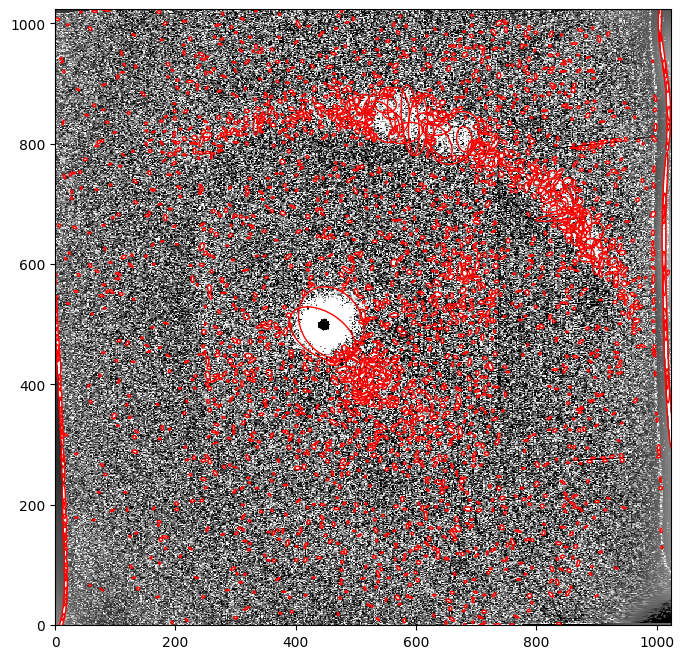

In [61]:
from matplotlib.patches import Ellipse

#plot background-subtracted image

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

#plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("objects-in-the-sky.png",dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# avaliable fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [58]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

#showing the first 10 object results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 14.682144 +/- 4.536475
object 1: flux = 16.818186 +/- 4.776183
object 2: flux = 18.275092 +/- 4.923897
object 3: flux = 15.923575 +/- 4.667433
object 4: flux = 18.349774 +/- 5.137078
object 5: flux = 11.833732 +/- 4.506308
object 6: flux = 13.688569 +/- 4.711450
object 7: flux = 14.133081 +/- 4.754594
object 8: flux = 13.407792 +/- 4.684128
object 9: flux = 16.539775 +/- 4.997675
